### Hello Qiskit

This notebook is a simple introduction to Qiskit, the quantum programming language.

In [1]:
# Import the qiskit package
import qiskit as qs
import matplotlib

# Setting to make sure that visuals show up in the notebook while I'm working
%matplotlib inline

In [2]:
# Check the version of the package and modules for reproducibility
qs.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

In [3]:
# Create a 2 qubit quantum register
# Keep in mind that quantum registers here are stored as a 2^n dimensional vector
quant_reg = qs.QuantumRegister(2)

In [4]:
# Create a 2 bit classical register
# Measurements are taken from this register after decoherence
class_reg = qs.ClassicalRegister(2)

In [5]:
# Create a quantum circuit from the above registers
# I prefer making the registers explicitly at first, as opposed to QuantumCircuit(3,3)
quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

In [6]:
# Have a look at the quantum circuit with basic visuals to show each register
quant_circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
# Create two copies of the same circuit to show the different gates in combinations
#h_quant_circuit = quant_circuit
#combo_quant_circuit = quant_circuit

## Adding Gates

- First adding just a Hadamard gate
- Then adding a CX gate to the circuit

In [8]:
quant_circuit.cx(quant_reg[0], quant_reg[1])

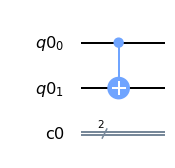

In [9]:
quant_circuit.draw(output = 'mpl')

In [10]:
quant_circuit.measure(quant_reg, class_reg)

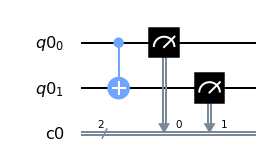

In [11]:
quant_circuit.draw(output = 'mpl')

In [12]:
qasm_sim = qs.Aer.get_backend('qasm_simulator')

quant_circuit_results = qs.execute(quant_circuit, backend = qasm_sim).result()

quant_circuit_results.get_counts()

{'00': 1024}

In [13]:
# Remake the quantum circuit
quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

# Add Hadamard gate to circuit
quant_circuit.h(quant_reg[0])

The Hadamard gate creates a superposition on the qubit register and will create a probability of that register representing 0 or 1 at 50% in an ideal case (a simulator here).

In a real quantum system, these probabilities will vary due to errors caused by interference

In [14]:
# Redraw the citcuit to see the new gate
quant_circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

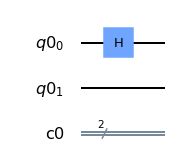

In [15]:
# Draw the circuit with some better visuals
quant_circuit.draw(output = 'mpl')

In [16]:
quant_circuit.measure(quant_reg, class_reg)

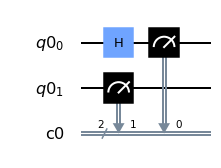

In [17]:
quant_circuit.draw(output = 'mpl')

In [18]:
qasm_sim = qs.Aer.get_backend('qasm_simulator')

quant_circuit_results = qs.execute(quant_circuit, backend = qasm_sim).result()

quant_circuit_results.get_counts()

{'00': 511, '01': 513}

#### Adding the CX Gate

In [19]:
# Remake the quantum circuit
quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)
quant_circuit.h(quant_reg[0])

# Add a controlled x gate to the other quantum register to create entanglement between the two quantum registers
# This is a controlled-Not gate 
quant_circuit.cx(quant_reg[0], quant_reg[1])

Adding a controlled-Not gate (also called the Pauli gate) to the second quantum register here.  It operates as the quantum version of a reversible exclusive OR (XOR) logic gate.

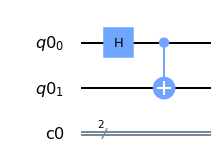

In [20]:
# Draw the circuit with some better visuals
quant_circuit.draw(output = 'mpl')

In [21]:
# Plot BLoch Spheres for both of the quantum registers in the circuit
#from qiskit import BasicAer
#from qiskit.quantum_info import Statevector
#from qiskit.visualization import plot_bloch_multivector

#state_backend = BasicAer.get_backend('statevector_simulator')
#result = qs.execute(test, state_backend).result()
#state_results  = result.get_statevector(test)

#plot_bloch_multivector(state_results, title="New Bloch Multivector")

There seems to be some issues with the Bloch multivector plot.  It never shows the vector in the plot.  Even in the docs the arrow doesn't appear.  In the official Qiskit textbook, the code they have doesn't even work it throws an error:

https://qiskit.org/textbook/ch-states/single-qubit-gates.html

https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html

In [22]:
# Add measures to each of the quantum registers and point them to the classical registers respectively
quant_circuit.measure(quant_reg, class_reg)

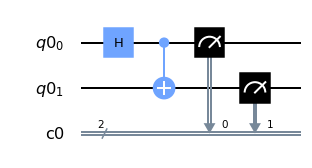

In [23]:
# Draw the circuit with the option for matplotlib
quant_circuit.draw(output = 'mpl')

Measurements are added to the classical registers.  The quantum registers have to decohere to be measured, and that information is placed into the classical registers.  I don't think the simulation supports going back to the quantum registers after decoherence.

In [24]:
# Instantiate the simulator to run the circuit
# Qasm is quantum assembly language
qasm_sim = qs.Aer.get_backend('qasm_simulator')

In [25]:
# Execute the circuit using the qasm simulator above
# Store the results
quant_circuit_results = qs.execute(quant_circuit, backend = qasm_sim).result()

In [26]:
# Check the counts from the simulation of the circuit
quant_circuit_results.get_counts()

{'00': 508, '11': 516}

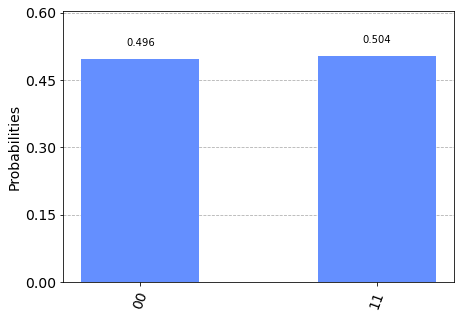

In [27]:
# Import the plot_histogram function so the results of the circuit can be seen
from qiskit.tools.visualization import plot_histogram

# Check the results of the simulation using the plot_histogram function
plot_histogram(quant_circuit_results.get_counts())

Keep in mind that this is a limited number of shots (hence the small amount of error between the two - not 50/50)

On a real device, which can be really noisy, the numbers will be different and there will be all values in between.  So, the results will include: [00, 01, 10, 11]